# Classification with Neural Networks using Python
Classification is the task of categorizing the known classes based on their features. In most classification problems, machine learning algorithms will do the job, but while classifying a large dataset of images, you will need to use a neural network. 

Here, I will be using the famous MNIST fashion dataset, which contains 70,000 clothing fashion images. Here our task is to train an image classification model with neural networks.

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()



In [27]:
# Define the data augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Randomly zoom in/out by up to 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode="nearest"      # Fill pixels that are newly created
)

# Add a channel dimension for grayscale images
xtrain = xtrain.reshape(-1, 28, 28, 1)
xtest = xtest.reshape(-1, 28, 28, 1)


Before moving forward, let's have a quick look at one of the samples of the images from the dataset:

Image Label : 5


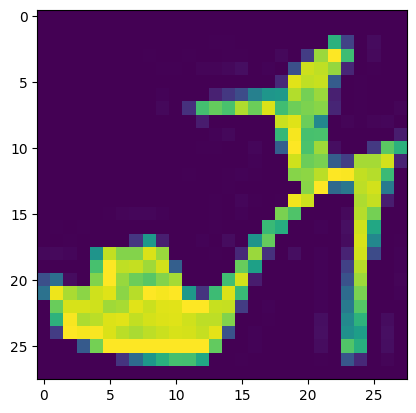

In [4]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :", ytrain[imgIndex])
plt.imshow(image)

Now let's have a look at the shape of both the training and test data:

In [5]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


## Building a Neural Network Architecture

Now I will build a neural network architecture with two hidden layers:

In [28]:
from tensorflow.keras.regularizers import l2

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.3),  # Add dropout
    keras.layers.Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.3),  # Add dropout
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

d:\Users\Documents\Private\Python Project\Classification using NN\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


Before training our model, split the training data into training and validation sets. We will use the validation set to evaluate the model's performance during training.

In [7]:
xvalid, xtrain = xtrain[:5000]/ 255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

## Training a Classification Model with Neural Networks

Now here's how we can train a neural network for the task of images classification:

In [30]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(
    datagen.flow(xtrain, ytrain, batch_size=32),  # Use augmented data
    validation_data=(xvalid.reshape(-1, 28, 28, 1), yvalid),  # Validation data unchanged
    epochs=30
)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.1011 - loss: nan - val_accuracy: 0.0914 - val_loss: nan
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.0914 - val_loss: nan
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.0986 - loss: nan - val_accuracy: 0.0914 - val_loss: nan
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.1007 - loss: nan - val_accuracy: 0.0914 - val_loss: nan
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.0982 - loss: nan - val_accuracy: 0.0914 - val_loss: nan
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.0986 - loss: nan - val_accuracy: 0.0914 - val_loss: nan
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.1012 - loss: nan - val_accuracy: 0.0914 - val_loss: nan
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.1001 - loss: nan - val_accuracy: 0.0914 - val_lo

In [31]:
xtest = xtest.reshape(-1, 28, 28, 1)

In [32]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1001 - loss: nan
Test Accuracy: 0.10000000149011612


Now let's have a look at the predictions:

In [9]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 6.4684893e-09 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


Here is how we can look at the predicted classes:

In [10]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 0]


So this how you can train a classification model with neural networks using Python.

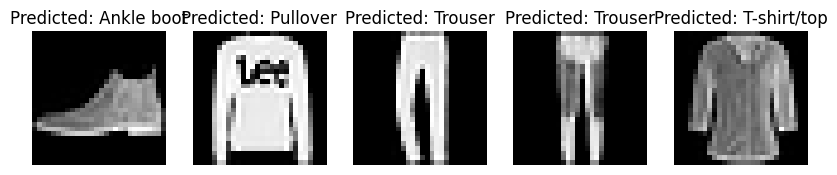

In [11]:
# Display predictions with corresponding test images
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(new[i], cmap="gray")
    plt.title(f"Predicted: {class_names[classes[i]]}")
    plt.axis("off")
plt.show()

In [12]:
# Evaluate the model on the test set
xtest = xtest/ 255.0
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8718 - loss: 0.3568
Test Loss: 0.3491980731487274
Test Accuracy: 0.8730000257492065


In [13]:
# Save the trained model
model.save("fashion_mnist_classifier.h5")
print("Model saved successfully!")

Model saved successfully!


### Summary

Classification is the task of categorizing the known classes based on their features. In most classification problems, machine learning algorithms will do the job,  but while classifying a large dataset of images, we will need to use a neural network.